In [95]:
import pandas as pd
da = pd.read_csv('C:/Users/11816/Desktop/mechine learning/HW4/housing2.csv')
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
ATT1       506 non-null float64
ATT2       506 non-null float64
ATT3       506 non-null float64
ATT4       506 non-null float64
ATT5       506 non-null float64
ATT6       506 non-null float64
ATT7       506 non-null float64
ATT8       506 non-null float64
ATT9       506 non-null float64
ATT10      506 non-null float64
ATT11      506 non-null float64
ATT12      506 non-null float64
ATT13      506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       452 non-null float64
dtypes: float64(26), int64(1)
mem

In [96]:
da=da.fillna(da.iloc[:,26].mean())
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
ATT1       506 non-null float64
ATT2       506 non-null float64
ATT3       506 non-null float64
ATT4       506 non-null float64
ATT5       506 non-null float64
ATT6       506 non-null float64
ATT7       506 non-null float64
ATT8       506 non-null float64
ATT9       506 non-null float64
ATT10      506 non-null float64
ATT11      506 non-null float64
ATT12      506 non-null float64
ATT13      506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(26), int64(1)
mem

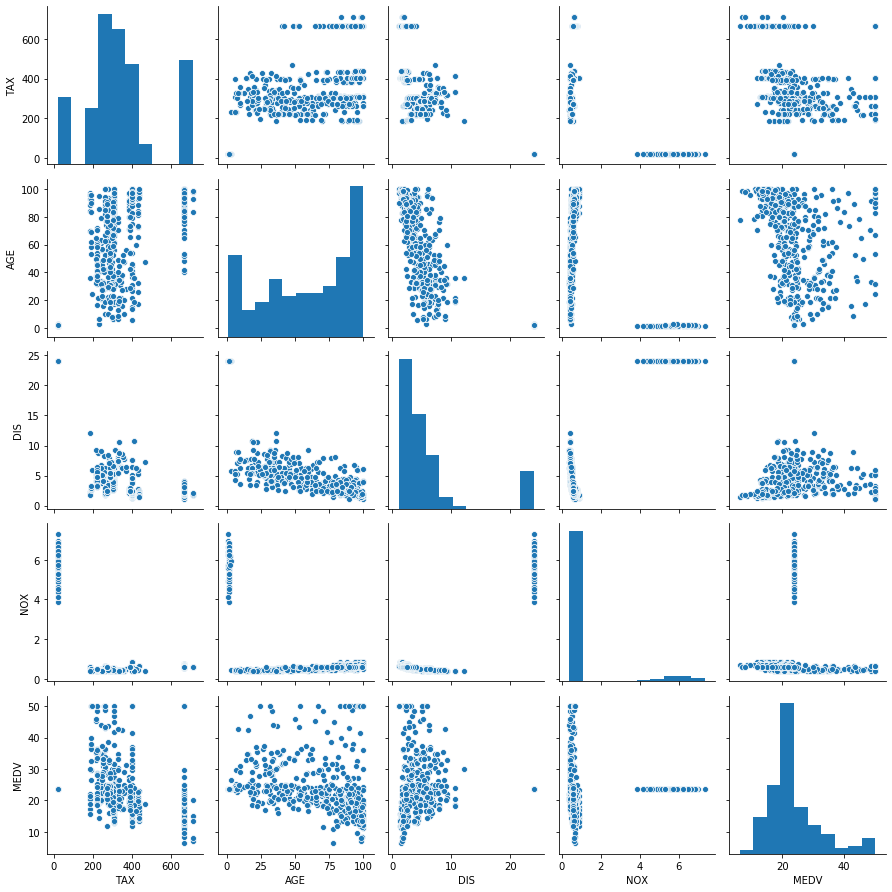

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cols = ['TAX', 'AGE', 'DIS', 'NOX', 'MEDV']
sns.pairplot(da[cols], height=2.5)
plt.tight_layout()
plt.show()

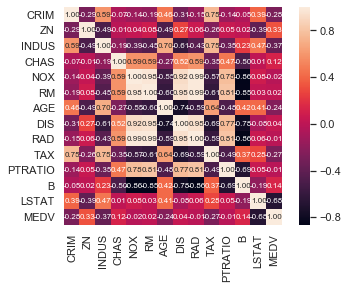

In [98]:
import numpy as np
cols1 = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'AGE', 'DIS', 'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
cm = np.corrcoef(da[cols1].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 8},
                yticklabels=cols1,
                xticklabels=cols1)
plt.show()

D:\Anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
D:\Anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
D:\Anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
D:\Anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
D:\Anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = oth

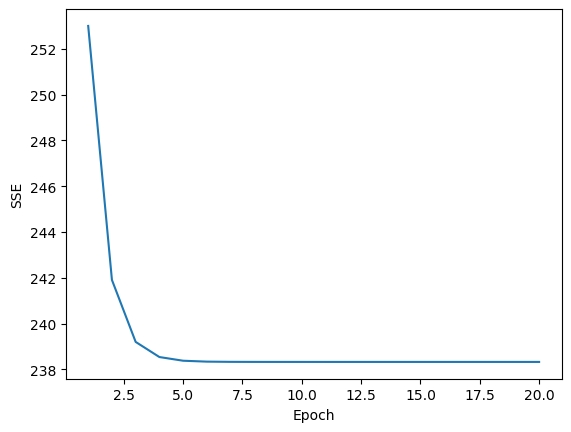

In [99]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

X = da[['AGE']].values
y = da['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)    

sns.reset_orig() # resets matplotlib style
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

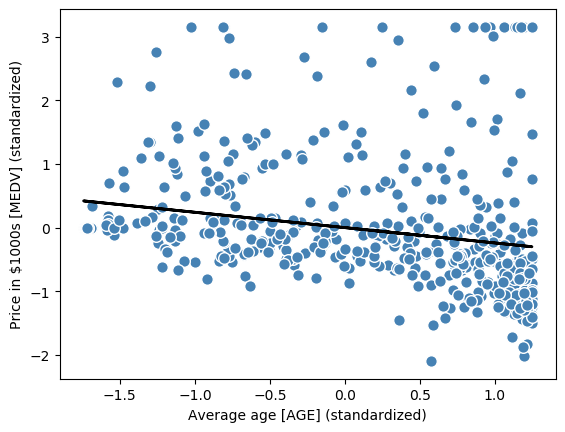

In [100]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average age [AGE] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [101]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: -0.241
Intercept: -0.000


In [102]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -0.061
Intercept: 27.307


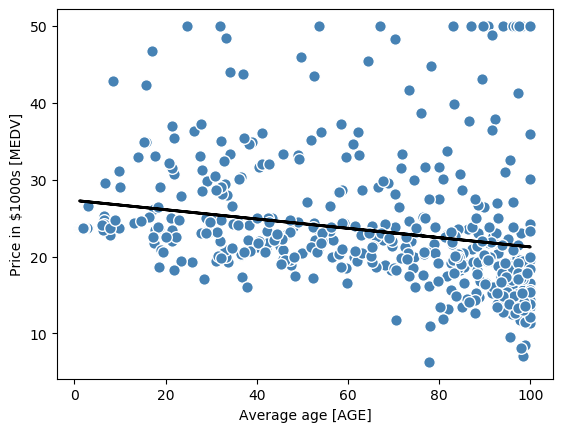

In [103]:
lin_regplot(X, y, slr)
plt.xlabel('Average age [AGE]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

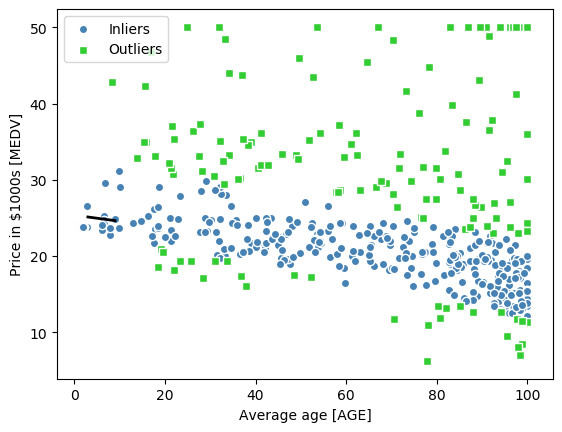

In [104]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                            max_trials=100,
                            min_samples=50,
                            loss='absolute_loss',
                            residual_threshold=5.0,
                            random_state=0)
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average age [AGE]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [105]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: -0.080
Intercept: 25.366


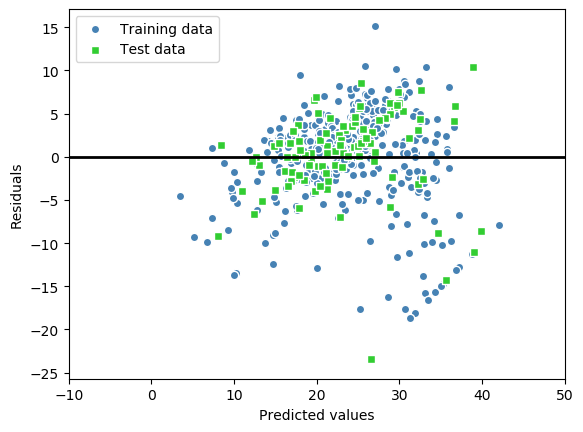

In [125]:
from sklearn.model_selection import train_test_split
X = da.iloc[:, :-1].values
y = da['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [126]:
b=ridge.coef_
print('Slope:',b)
print('Intercept: %.3f' % slr.intercept_)

Slope: [ 1.45697129e+00 -1.28311054e+00  6.31291036e-01 -1.86221320e-01
 -9.41624405e-01 -9.68119066e-01  1.18929946e+00  1.75385612e-01
  7.40809243e-02 -2.87154696e-01 -3.07491138e-01  5.06903096e-01
 -2.92458815e-02  2.05786881e-01  8.72354038e-02 -1.78321440e-01
  2.04218926e+00 -3.87931548e-01  8.19375502e-02  5.54246548e-03
 -1.77021764e+00  4.12838350e-02 -1.17697242e-02  1.78118593e-03
  1.04457655e-02 -8.46929106e-01]
Intercept: 41.102


In [127]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

MSE train: 29.493, test: 24.129


In [128]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.587, test: 0.592


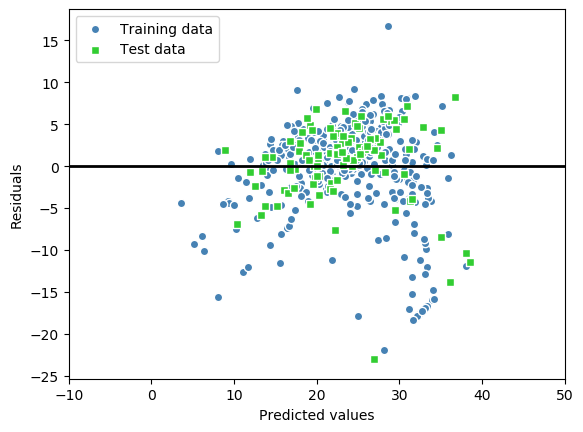

In [141]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [142]:
a=ridge.coef_
print('Slope:',a)
print('Intercept: %.3f' % ridge.intercept_)

Slope: [ 5.56087771e-01 -5.47623895e-01  2.82541079e-01 -1.00964107e-01
 -3.70659463e-01 -3.45560572e-01  4.72920779e-01  7.75786586e-02
  4.47726110e-02 -1.50841783e-01 -1.33372923e-01  1.85024461e-01
 -3.01939821e-02  2.02782353e-01  8.06589523e-02 -1.53054156e-01
  7.69526688e-01 -1.15648184e-01  8.40855073e-02  1.26646099e-02
 -1.54757664e+00  3.53347576e-02 -1.11017466e-02  1.22648616e-03
  1.09050742e-02 -8.58106707e-01]
Intercept: 38.705


In [143]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

MSE train: 31.094, test: 22.318


In [144]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.565, test: 0.623


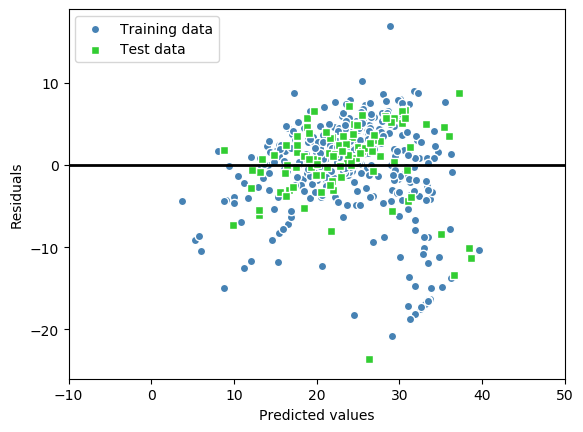

In [157]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [158]:
c=lasso.coef_
print('Slope:',a)
print('Intercept: %.3f' % lasso.intercept_)

Slope: [ 5.56087771e-01 -5.47623895e-01  2.82541079e-01 -1.00964107e-01
 -3.70659463e-01 -3.45560572e-01  4.72920779e-01  7.75786586e-02
  4.47726110e-02 -1.50841783e-01 -1.33372923e-01  1.85024461e-01
 -3.01939821e-02  2.02782353e-01  8.06589523e-02 -1.53054156e-01
  7.69526688e-01 -1.15648184e-01  8.40855073e-02  1.26646099e-02
 -1.54757664e+00  3.53347576e-02 -1.11017466e-02  1.22648616e-03
  1.09050742e-02 -8.58106707e-01]
Intercept: 39.827


In [159]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

MSE train: 30.519, test: 22.554


In [160]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.573, test: 0.619


In [161]:
print("My name is Binjie Xu")
print("My NetID is: binjiex2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Binjie Xu
My NetID is: binjiex2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
